In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [3]:
my_dataset = data_dict
data = pd.DataFrame.from_dict(data_dict, orient="index")

In [4]:
data.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,...,47,1729541,2195,152,65,False,304805,1407,126027,NaN
BADUM JAMES P,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,...,NaN,257817,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,...,39,4046157,29,864523,0,False,NaN,465,1757552,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,frank.bay@enron.com,-82782,-201641,63014,...,NaN,NaN,NaN,69,NaN,False,NaN,NaN,145796,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
loan_advances                146 non-null object
bonus                        146 non-null object
email_address                146 non-null object
restricted_stock_deferred    146 non-null object
deferred_income              146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
from_poi_to_this_person      146 non-null object
exercised_stock_options      146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null bool
long_term_incentive          146 non-null object


In [6]:
Miss = []
Atributos = list(np.array(data.columns))
Atributos.remove("poi")
for i in Atributos:
    Miss.append(data[data[i] == "NaN"].count()[0])
print (Miss)


[51, 60, 107, 21, 142, 64, 35, 128, 97, 20, 51, 60, 44, 60, 53, 60, 80, 60, 36, 129]


Text(0,0.5,'Dados faltando')

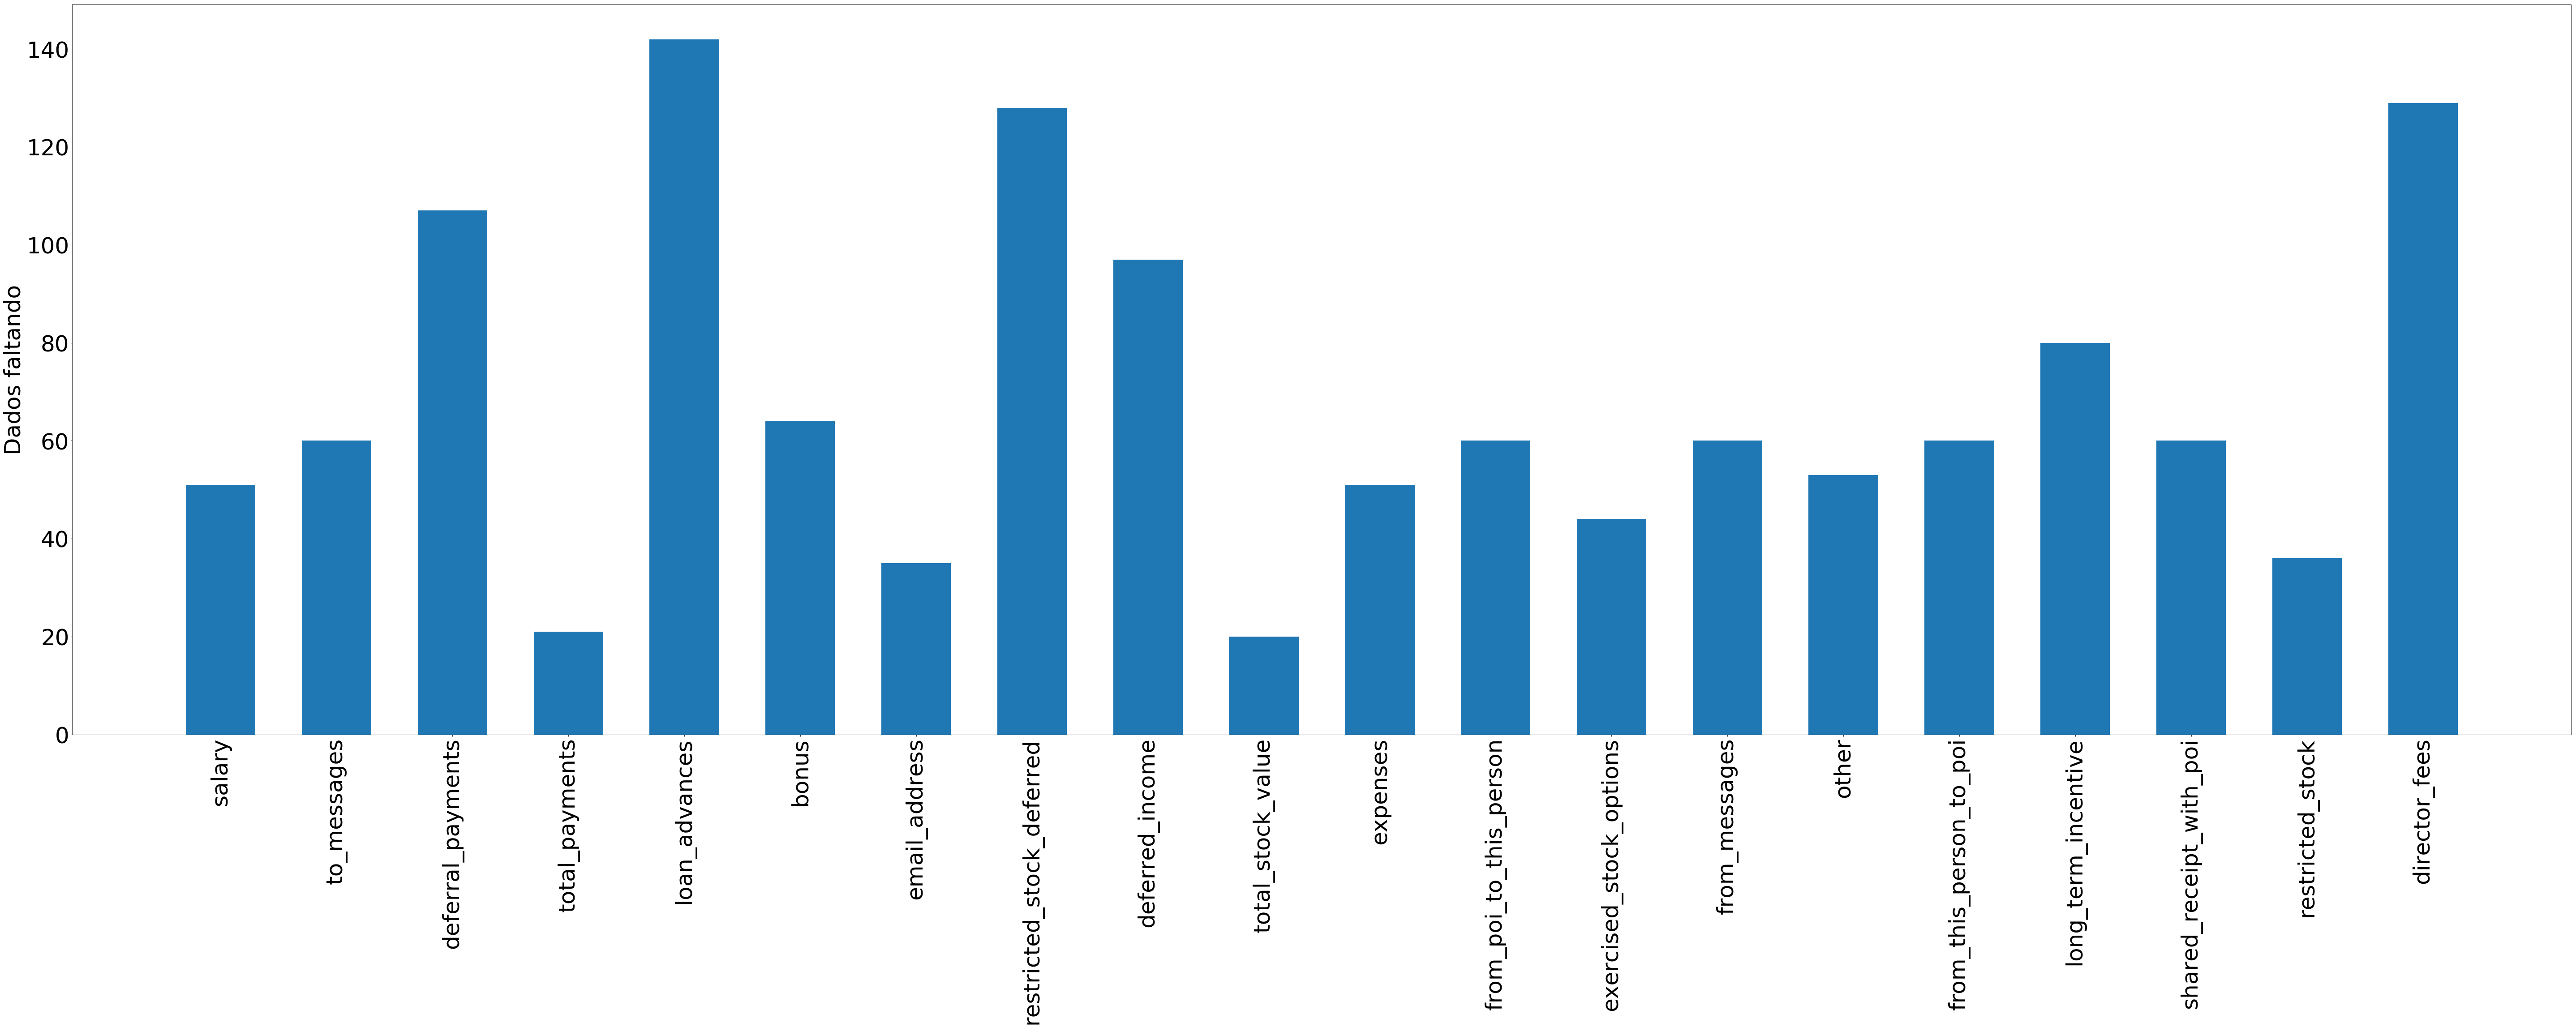

In [7]:
plt.figure(figsize=(100, 30))
plt.bar(range(len(Atributos)),Miss,width=0.6)
plt.xticks(range(len(Atributos)),Atributos,fontsize=50, rotation=90)
plt.yticks(fontsize=50)
plt.ylabel("Dados faltando",fontsize=50)

In [55]:
Messages_to = data["to_messages"].values
Messages_to_poi = data["from_this_person_to_poi"].values
frac_to_poi = []
for i in range(len(Messages_to)):
    if Messages_to[i] != "NaN":
        if Messages_to_poi[i] != "NaN":
            frac_to_poi.append(Messages_to_poi[i]/Messages_to[i])
        else:
            frac_to_poi.append(0)
    else:
        frac_to_poi.append(0)

data["frac_to_poi"] = pd.Series(frac_to_poi)
data.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,frac_to_poi
ALLEN PHILLIP K,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,...,1729541,2195,152,65,False,304805,1407,126027,NaN,NaN
BADUM JAMES P,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,...,257817,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,...,4046157,29,864523,0,False,NaN,465,1757552,NaN,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,frank.bay@enron.com,-82782,-201641,63014,...,NaN,NaN,69,NaN,False,NaN,NaN,145796,NaN,NaN


In [46]:
poi_y = data[data["poi"] == True]
poi_n = data[data["poi"] == False] 

In [47]:
print ("Números de poi:",poi_y.count()[0])
print ("Números de não poi", poi_n.count()[0])

Números de poi: 18
Números de não poi 128


In [48]:
a = "NaN"
data_limpo = data[data["salary"] != "NaN"].query('total_payments != @a')
data_limpo = data_limpo[data_limpo["total_payments"] < 100000000]

In [49]:
data_limpo_poi_y = data_limpo[data_limpo["poi"] == True]
data_limpo_poi_n = data_limpo[data_limpo["poi"] == False]

In [56]:
data_limpo_poi_y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, BELDEN TIMOTHY N to YEAGER F SCOTT
Data columns (total 22 columns):
salary                       16 non-null object
to_messages                  16 non-null object
deferral_payments            16 non-null object
total_payments               16 non-null object
loan_advances                16 non-null object
bonus                        16 non-null object
email_address                16 non-null object
restricted_stock_deferred    16 non-null object
deferred_income              16 non-null object
total_stock_value            16 non-null object
expenses                     16 non-null object
from_poi_to_this_person      16 non-null object
exercised_stock_options      16 non-null object
from_messages                16 non-null object
other                        16 non-null object
from_this_person_to_poi      16 non-null object
poi                          16 non-null bool
long_term_incentive          16 non-null object
shared_receip

In [57]:
data_limpo_poi_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, ALLEN PHILLIP K to WHITE JR THOMAS E
Data columns (total 22 columns):
salary                       77 non-null object
to_messages                  77 non-null object
deferral_payments            77 non-null object
total_payments               77 non-null object
loan_advances                77 non-null object
bonus                        77 non-null object
email_address                77 non-null object
restricted_stock_deferred    77 non-null object
deferred_income              77 non-null object
total_stock_value            77 non-null object
expenses                     77 non-null object
from_poi_to_this_person      77 non-null object
exercised_stock_options      77 non-null object
from_messages                77 non-null object
other                        77 non-null object
from_this_person_to_poi      77 non-null object
poi                          77 non-null bool
long_term_incentive          77 non-null object
shared_rece